# Final Project - Part 1

In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# add import warnigns to skip any warning messages on the screen
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import the csv files
game_plays = pd.read_csv("game_plays.csv")
games = pd.read_csv('game.csv')
team_info = pd.read_csv("team_info.csv")
team_stats = pd.read_csv("game_teams_stats.csv")
teams = team_info.merge(team_stats, on='team_id')

# Check first dataset - game_plays

In [7]:
game_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050529 entries, 0 to 5050528
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   play_id              object 
 1   game_id              int64  
 2   team_id_for          float64
 3   team_id_against      float64
 4   event                object 
 5   secondaryType        object 
 6   x                    float64
 7   y                    float64
 8   period               int64  
 9   periodType           object 
 10  periodTime           int64  
 11  periodTimeRemaining  float64
 12  dateTime             object 
 13  goals_away           int64  
 14  goals_home           int64  
 15  description          object 
 16  st_x                 float64
 17  st_y                 float64
dtypes: float64(7), int64(5), object(6)
memory usage: 693.6+ MB


In [8]:
game_plays.describe()

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,5.050529e+06,4.117824e+06,4.117824e+06,3.916165e+06,3.916196e+06,5.050529e+06,5.050529e+06,4.857510e+06,5.050529e+06,5.050529e+06,3.916165e+06,3.916165e+06
mean,2.014891e+09,1.774251e+01,1.769530e+01,1.870930e-01,-1.592162e-01,2.027452e+00,5.873354e+02,5.977131e+02,1.245695e+00,1.378458e+00,1.002389e+01,1.851768e-01
std,3.627240e+06,1.246832e+01,1.244507e+01,6.428284e+01,2.297686e+01,8.735167e-01,3.657126e+02,3.645106e+02,1.318483e+00,1.418523e+00,6.349677e+01,2.297670e+01
min,2.000020e+09,1.000000e+00,1.000000e+00,-1.000000e+02,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-4.200000e+01
25%,2.012030e+09,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.670000e+02,2.800000e+02,0.000000e+00,0.000000e+00,-6.200000e+01,-2.200000e+01
50%,2.015030e+09,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.810000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.300000e+01,0.000000e+00
75%,2.018021e+09,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.040000e+02,9.150000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.019041e+09,9.000000e+01,9.000000e+01,1.000000e+02,4.200000e+01,8.000000e+00,1.200000e+03,1.200000e+03,1.100000e+01,1.200000e+01,1.000000e+02,4.200000e+01


In [10]:
# check all non-numeric columns
game_plays.describe(include=np.object)

,play_id,event,secondaryType,periodType,dateTime,description
count,5050529,5050529,1182016,5050529,5050529,5050529
unique,4217063,22,98,3,3678870,1314522
top,2019020867_28,Faceoff,Wrist Shot,REGULAR,2019-03-31 00:00:00,Goalie Stopped
freq,2,894041,489877,4940391,3402,252802


In [11]:
#check data for any strong correlation - correlation matrix
game_plays.corr()

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
game_id,1.000000,0.093347,0.092299,-0.003256,0.004185,-0.012410,-0.005665,0.001176,0.012450,0.005022,-0.004453,0.001835
team_id_for,0.093347,1.000000,0.159276,-0.000815,-0.003308,-0.003920,-0.001440,-0.000051,-0.004925,0.002355,0.004039,0.004563
team_id_against,0.092299,0.159276,1.000000,0.002299,-0.003512,-0.002557,-0.000942,-0.000962,-0.004183,0.003826,-0.000033,0.000898
x,-0.003256,-0.000815,0.002299,1.000000,-0.005334,0.001091,-0.001527,0.001131,-0.002347,0.004100,-0.002086,-0.004359
y,0.004185,-0.003308,-0.003512,-0.005334,1.000000,0.002893,-0.000006,-0.000561,0.002394,0.001864,-0.003295,-0.003906
period,-0.012410,-0.003920,-0.002557,0.001091,0.002893,1.000000,-0.053974,-0.061168,0.535031,0.536201,0.008662,0.001171
periodTime,-0.005665,-0.001440,-0.000942,-0.001527,-0.000006,-0.053974,1.000000,-0.946053,0.172940,0.184314,-0.009919,0.000678
periodTimeRemaining,0.001176,-0.000051,-0.000962,0.001131,-0.000561,-0.061168,-0.946053,1.000000,-0.215686,-0.219280,-0.000175,-0.000265
goals_away,0.012450,-0.004925,-0.004183,-0.002347,0.002394,0.535031,0.172940,-0.215686,1.000000,0.357782,0.008067,0.000698
goals_home,0.005022,0.002355,0.003826,0.004100,0.001864,0.536201,0.184314,-0.219280,0.357782,1.000000,0.004730,0.000557


In [12]:
# Clean version of correlation matrix (visualize)
corr = game_plays.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
game_id,1.00,0.09,0.09,-0.00,0.00,-0.01,-0.01,0.00,0.01,0.01,-0.00,0.00
team_id_for,0.09,1.00,0.16,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
team_id_against,0.09,0.16,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
x,-0.00,-0.00,0.00,1.00,-0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
y,0.00,-0.00,-0.00,-0.01,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
period,-0.01,-0.00,-0.00,0.00,0.00,1.00,-0.05,-0.06,0.54,0.54,0.01,0.00
periodTime,-0.01,-0.00,-0.00,-0.00,-0.00,-0.05,1.00,-0.95,0.17,0.18,-0.01,0.00
periodTimeRemaining,0.00,-0.00,-0.00,0.00,-0.00,-0.06,-0.95,1.00,-0.22,-0.22,-0.00,-0.00
goals_away,0.01,-0.00,-0.00,-0.00,0.00,0.54,0.17,-0.22,1.00,0.36,0.01,0.00
goals_home,0.01,0.00,0.00,0.00,0.00,0.54,0.18,-0.22,0.36,1.00,0.00,0.00


In [15]:
game_plays.dropna()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0
5,2016020045_6,2016020045,16.0,4.0,Goal,Wrap-around,-88.0,5.0,1,REGULAR,56,1144.0,2016-10-19 01:41:48,0,1,"Patrick Kane (1) Wrap-around, assists: Artem A...",88.0,-5.0
7,2016020045_8,2016020045,4.0,16.0,Shot,Wrist Shot,56.0,-7.0,1,REGULAR,69,1131.0,2016-10-19 01:42:41,0,1,Dale Weise Wrist Shot saved by Corey Crawford,56.0,-7.0
11,2016020045_12,2016020045,16.0,4.0,Shot,Slap Shot,-37.0,-24.0,1,REGULAR,133,1067.0,2016-10-19 01:43:45,0,1,Duncan Keith Slap Shot saved by Michal Neuvirth,37.0,24.0
16,2016020045_17,2016020045,4.0,16.0,Shot,Wrist Shot,57.0,-20.0,1,REGULAR,168,1032.0,2016-10-19 01:44:54,0,1,Wayne Simmonds Wrist Shot saved by Corey Crawford,57.0,-20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050504,2018030417_277,2018030417,19.0,6.0,Goal,Snap Shot,-77.0,7.0,3,REGULAR,922,278.0,2019-06-13 03:31:08,4,0,"Zach Sanford (1) Snap Shot, assists: David Per...",77.0,-7.0
5050507,2018030417_280,2018030417,19.0,6.0,Shot,Snap Shot,-69.0,7.0,3,REGULAR,951,249.0,2019-06-13 03:32:35,4,0,Alexander Steen Snap Shot saved by Tuukka Rask,69.0,-7.0
5050508,2018030417_281,2018030417,19.0,6.0,Shot,Snap Shot,-65.0,-4.0,3,REGULAR,955,245.0,2019-06-13 03:32:39,4,0,Ryan O'Reilly Snap Shot saved by Tuukka Rask,65.0,4.0
5050512,2018030417_285,2018030417,6.0,19.0,Shot,Wrist Shot,42.0,3.0,3,REGULAR,1010,190.0,2019-06-13 03:36:01,4,0,Marcus Johansson Wrist Shot saved by Jordan Bi...,42.0,3.0


Text(0, 0.5, 'Count')

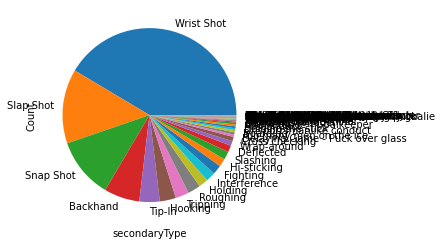

In [46]:
#explore/visualize secondtype column
game_plays['secondaryType'].value_counts().plot(kind='pie')
plt.xlabel('secondaryType')
plt.ylabel('Count')


wrists shot,Snap Shot and Slap Shot are the top three  popular shot type in  the game

# Explore the second dataset - game

In [21]:
# check game file for data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 26305 non-null  int64 
 1   season                  26305 non-null  int64 
 2   type                    26305 non-null  object
 3   date_time_GMT           26305 non-null  object
 4   away_team_id            26305 non-null  int64 
 5   home_team_id            26305 non-null  int64 
 6   away_goals              26305 non-null  int64 
 7   home_goals              26305 non-null  int64 
 8   outcome                 26305 non-null  object
 9   home_rink_side_start    25109 non-null  object
 10  venue                   26305 non-null  object
 11  venue_link              26305 non-null  object
 12  venue_time_zone_id      26305 non-null  object
 13  venue_time_zone_offset  26305 non-null  int64 
 14  venue_time_zone_tz      26305 non-null  object
dtypes:

In [22]:
# get an overview of the values each column contains
# .describe() only analyzes numeric columns by default
games.describe()

,game_id,season,away_team_id,home_team_id,away_goals,home_goals,venue_time_zone_offset
count,2.630500e+04,2.630500e+04,26305.000000,26305.000000,26305.000000,26305.000000,26305.000000
mean,2.010765e+09,2.010945e+07,16.879377,16.881429,2.687968,2.958981,-5.066147
std,6.073568e+06,6.073849e+04,11.184920,11.205625,1.619068,1.689031,1.210145
min,2.000020e+09,2.000200e+07,1.000000,1.000000,0.000000,0.000000,-8.000000
25%,2.006020e+09,2.006201e+07,8.000000,8.000000,1.000000,2.000000,-6.000000
50%,2.011021e+09,2.011201e+07,16.000000,16.000000,3.000000,3.000000,-5.000000
75%,2.016030e+09,2.016202e+07,24.000000,24.000000,4.000000,4.000000,-4.000000
max,2.019041e+09,2.019202e+07,90.000000,90.000000,11.000000,12.000000,-4.000000


In [23]:
# check all non-numeric columns
games.describe(include=np.object)

,type,date_time_GMT,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_tz
count,26305,26305,26305,25109,26305,26305,26305,26305
unique,3,14468,8,2,116,34,11,8
top,R,2019-11-28T00:00:00Z,home win REG,right,Madison Square Garden,/api/v1/venues/null,America/New_York,EDT
freq,25171,16,11256,13426,882,19352,11740,11997


In [24]:
#check data for any strong correlation - correlation matrix
games.corr()

,game_id,season,away_team_id,home_team_id,away_goals,home_goals,venue_time_zone_offset
game_id,1.000000,1.000000,0.122027,0.121974,0.045446,0.037946,-0.200089
season,1.000000,1.000000,0.122022,0.121967,0.045448,0.037957,-0.200089
away_team_id,0.122027,0.122022,1.000000,0.240464,-0.017823,0.000306,-0.272322
home_team_id,0.121974,0.121967,0.240464,1.000000,-0.007909,0.000623,-0.637963
away_goals,0.045446,0.045448,-0.017823,-0.007909,1.000000,-0.045941,0.002077
home_goals,0.037946,0.037957,0.000306,0.000623,-0.045941,1.000000,-0.008749
venue_time_zone_offset,-0.200089,-0.200089,-0.272322,-0.637963,0.002077,-0.008749,1.000000


Text(0, 0.5, 'Count')

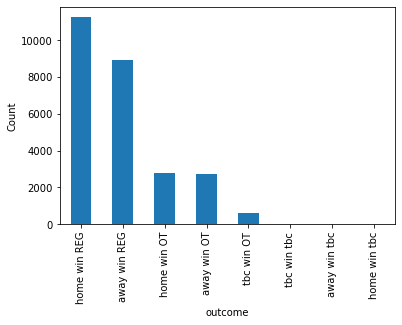

In [49]:
#explore/visualize age column
games['outcome'].value_counts().plot(kind='bar')
plt.xlabel('outcome')
plt.ylabel('Count')

Home win in regular game is more than away game. In OT game, home and away games are same

# Explore the third dataset - team feature

In [78]:
team_info = pd.read_csv("team_info.csv")
team_stats = pd.read_csv("game_teams_stats.csv")
teams = team_info.merge(team_stats, on='team_id')
teams

,team_id,franchiseId,shortName,teamName,abbreviation,link,game_id,HoA,won,settled_in,...,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2016020107,home,False,OT,...,32.0,22.0,10.0,4.0,1.0,43.3,7.0,7.0,16.0,right
1,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020981,home,False,REG,...,18.0,21.0,12.0,3.0,0.0,50.9,7.0,2.0,2.0,right
2,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020482,away,False,OT,...,32.0,27.0,6.0,3.0,0.0,49.1,12.0,5.0,25.0,left
3,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020453,away,True,REG,...,21.0,10.0,6.0,1.0,0.0,44.4,2.0,4.0,18.0,right
4,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020952,home,True,REG,...,33.0,34.0,4.0,1.0,0.0,47.3,11.0,11.0,9.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52585,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001021062,away,True,OT,...,15.0,NaN,43.0,2.0,0.0,NaN,NaN,NaN,NaN,right
52586,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020861,away,False,REG,...,25.0,NaN,6.0,2.0,0.0,NaN,NaN,NaN,NaN,left
52587,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020628,home,False,REG,...,25.0,NaN,9.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
52588,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020436,away,False,REG,...,25.0,NaN,19.0,2.0,1.0,NaN,NaN,NaN,NaN,right


In [79]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52590 entries, 0 to 52589
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_id                 52590 non-null  int64  
 1   franchiseId             52590 non-null  int64  
 2   shortName               52590 non-null  object 
 3   teamName                52590 non-null  object 
 4   abbreviation            52590 non-null  object 
 5   link                    52590 non-null  object 
 6   game_id                 52590 non-null  int64  
 7   HoA                     52590 non-null  object 
 8   won                     52590 non-null  bool   
 9   settled_in              52590 non-null  object 
 10  head_coach              52562 non-null  object 
 11  goals                   52582 non-null  float64
 12  shots                   52582 non-null  float64
 13  hits                    47662 non-null  float64
 14  pim                     52582 non-null

In [80]:
teams.fillna(0)
teams

,team_id,franchiseId,shortName,teamName,abbreviation,link,game_id,HoA,won,settled_in,...,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2016020107,home,False,OT,...,32.0,22.0,10.0,4.0,1.0,43.3,7.0,7.0,16.0,right
1,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020981,home,False,REG,...,18.0,21.0,12.0,3.0,0.0,50.9,7.0,2.0,2.0,right
2,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020482,away,False,OT,...,32.0,27.0,6.0,3.0,0.0,49.1,12.0,5.0,25.0,left
3,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2015020453,away,True,REG,...,21.0,10.0,6.0,1.0,0.0,44.4,2.0,4.0,18.0,right
4,1,23,New Jersey,Devils,NJD,/api/v1/teams/1,2017020952,home,True,REG,...,33.0,34.0,4.0,1.0,0.0,47.3,11.0,11.0,9.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52585,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001021062,away,True,OT,...,15.0,NaN,43.0,2.0,0.0,NaN,NaN,NaN,NaN,right
52586,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020861,away,False,REG,...,25.0,NaN,6.0,2.0,0.0,NaN,NaN,NaN,NaN,left
52587,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020628,home,False,REG,...,25.0,NaN,9.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
52588,11,35,Atlanta,Thrashers,ATL,/api/v1/teams/11,2001020436,away,False,REG,...,25.0,NaN,19.0,2.0,1.0,NaN,NaN,NaN,NaN,right


In [81]:
teams.describe()

,team_id,franchiseId,game_id,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
count,52590.000000,52590.000000,5.259000e+04,52582.000000,52582.000000,47662.000000,52582.000000,52582.000000,52582.000000,30442.000000,47662.000000,47662.000000,47662.000000
mean,16.853242,21.991938,2.010762e+09,2.779906,29.934331,21.136272,11.759309,3.694972,0.667928,49.967157,8.836012,6.745604,13.322479
std,11.110286,9.734349,6.072715e+06,1.655466,6.894357,9.229217,9.028372,1.869574,0.813144,7.318581,5.477372,4.145126,5.576798
min,1.000000,1.000000,2.000020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,15.000000,2.006020e+09,2.000000,25.000000,15.000000,6.000000,2.000000,0.000000,45.200000,5.000000,4.000000,10.000000
50%,16.000000,23.000000,2.011021e+09,3.000000,30.000000,20.000000,10.000000,3.000000,0.000000,50.000000,8.000000,6.000000,13.000000
75%,24.000000,30.000000,2.016030e+09,4.000000,34.000000,27.000000,15.000000,5.000000,1.000000,54.800000,12.000000,9.000000,17.000000
max,54.000000,38.000000,2.019030e+09,12.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.200000,52.000000,40.000000,62.000000


In [82]:
#check data for any strong correlation - correlation matrix
teams.corr()

,team_id,franchiseId,game_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
team_id,1.000000,0.471184,0.119823,-0.001264,-0.013303,-0.015984,0.017375,-0.041346,-0.027484,-0.012394,0.009253,-0.024770,-0.002096,-0.000086
franchiseId,0.471184,1.000000,0.016573,-0.016293,-0.017771,-0.042752,-0.042393,-0.009054,0.007532,-0.009739,-0.022103,-0.072710,0.037537,-0.005933
game_id,0.119823,0.016573,1.000000,0.035650,0.036254,0.155530,0.344685,-0.281970,-0.343894,-0.091761,-0.001901,0.134576,0.145695,0.279989
won,-0.001264,-0.016293,0.035650,1.000000,0.597097,0.025058,-0.039381,-0.040240,0.014081,0.240907,0.031004,-0.004798,0.104967,0.166629
goals,-0.013303,-0.017771,0.036254,0.597097,1.000000,0.151203,-0.063030,0.039447,0.098912,0.461154,0.036262,0.013347,0.095932,0.095591
shots,-0.015984,-0.042752,0.155530,0.025058,0.151203,1.000000,0.048743,-0.083150,0.119794,0.083255,0.138696,0.048091,0.099811,-0.075600
hits,0.017375,-0.042393,0.344685,-0.039381,-0.063030,0.048743,1.000000,-0.063730,-0.189434,-0.074158,0.003495,0.201061,0.165145,0.290166
pim,-0.041346,-0.009054,-0.281970,-0.040240,0.039447,-0.083150,-0.063730,1.000000,0.289906,0.124967,-0.008750,-0.068493,-0.069169,-0.064666
powerPlayOpportunities,-0.027484,0.007532,-0.343894,0.014081,0.098912,0.119794,-0.189434,0.289906,1.000000,0.416223,0.045339,-0.012934,-0.059682,-0.165525
powerPlayGoals,-0.012394,-0.009739,-0.091761,0.240907,0.461154,0.083255,-0.074158,0.124967,0.416223,1.000000,0.024833,-0.001838,0.014771,0.007283


In [83]:
# Clean version of correlation matrix (visualize)
corr = teams.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,team_id,franchiseId,game_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
team_id,1.00,0.47,0.12,-0.00,-0.01,-0.02,0.02,-0.04,-0.03,-0.01,0.01,-0.02,-0.00,-0.00
franchiseId,0.47,1.00,0.02,-0.02,-0.02,-0.04,-0.04,-0.01,0.01,-0.01,-0.02,-0.07,0.04,-0.01
game_id,0.12,0.02,1.00,0.04,0.04,0.16,0.34,-0.28,-0.34,-0.09,-0.00,0.13,0.15,0.28
won,-0.00,-0.02,0.04,1.00,0.60,0.03,-0.04,-0.04,0.01,0.24,0.03,-0.00,0.10,0.17
goals,-0.01,-0.02,0.04,0.60,1.00,0.15,-0.06,0.04,0.10,0.46,0.04,0.01,0.10,0.10
shots,-0.02,-0.04,0.16,0.03,0.15,1.00,0.05,-0.08,0.12,0.08,0.14,0.05,0.10,-0.08
hits,0.02,-0.04,0.34,-0.04,-0.06,0.05,1.00,-0.06,-0.19,-0.07,0.00,0.20,0.17,0.29
pim,-0.04,-0.01,-0.28,-0.04,0.04,-0.08,-0.06,1.00,0.29,0.12,-0.01,-0.07,-0.07,-0.06
powerPlayOpportunities,-0.03,0.01,-0.34,0.01,0.10,0.12,-0.19,0.29,1.00,0.42,0.05,-0.01,-0.06,-0.17
powerPlayGoals,-0.01,-0.01,-0.09,0.24,0.46,0.08,-0.07,0.12,0.42,1.00,0.02,-0.00,0.01,0.01


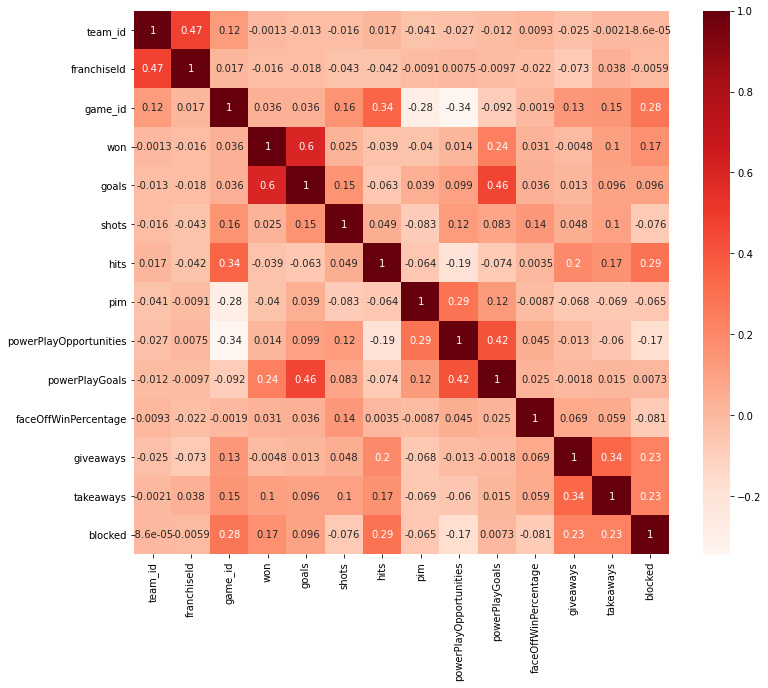

In [84]:
plt.figure(figsize=(12,10))
cor = teams.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Goals is the most correlated feature with won. This makes sense on an intuitive level, since more goals scored should equate to higher chance of winning.

powerPlayGoals are very highly correlated, which makes sense. 

shots,hits,pim,takeaway, and faceOffWinPercentage are also pretty correlated